<a href="https://colab.research.google.com/github/rpedram/data-science/blob/main/svy_data_child_dev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Child development study
This is a survey data of a study that broadly seeks to find out how the physical environmental parameters affect activity level in children


*   Data is collected from QGIS with geo loc of kid
*   rest is physical svy
*   composite variables have been created from likert scale questions
* Aim is not to make a ML model but to inden key papameters that have impact on kids devp overall
* Study is theorised on some dense social studies conceps. I skip that.
* Sample size has been determined based on a pilot study for a corelation value of more than 0.15 wwith fischer transformation. Size is 341
* Size constrains application of ML




## Import data into colab

In [61]:

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Get the file path from Google Drive
file_path = '/content/drive/My Drive/Dataset/ml_class/svy_data_chd_dev.csv'

# Read the file into a Pandas DataFrame
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data wrangling
Code for descriptive stats and data wrangling.  

1.   This is a treated data
2.   there are no nullls
3.   Outlier treatment applier- winsorize as data was skewed and lots of info in outliers.
4. Summary of descriptive stats
5. PCA was done in spss on the three dependent variables due to intercollation. PCA component designated as 'chd_dev_fc' Skipping this from python code.


In [62]:
print(df.head())
print(df.info())
# Describe numerical variables to check for missing values, outliers, etc.
print(df.describe())

print(df.info())
df

             id sector  mode_tpt_sch  play_score  social_intearaction  \
0  Main-BN-3-01     BN             1   76.023789                   14   
1  Main-BN-3-02     BN             1   67.102897                   16   
2  Main-BN-3-03     BN             1   45.890423                   15   
3  Main-BN-3-04     BN             1   88.470885                   15   
4  Main-BN-3-05     BN             1   67.931799                   18   

   neighbourhd_att  density  comm_to_res_ratio   entropy  \
0              7.0     1.03               0.09  0.169214   
1              1.0     0.97               0.08  0.225929   
2              3.0     0.84               0.15  0.251005   
3              9.0     0.98               0.06  0.228802   
4              6.0     0.93               0.18  0.319226   

   openspace_to_resi_ratio  ...  area_recspace  reca_score  age_cat  gender  \
0                     0.01  ...           1533  184.006959        1       1   
1                     0.04  ...           

,id,sector,mode_tpt_sch,play_score,social_intearaction,neighbourhd_att,density,comm_to_res_ratio,entropy,openspace_to_resi_ratio,...,area_recspace,reca_score,age_cat,gender,income_cat,motivation_score,tfc_safely_pxn,pers_safety_pxn,facility_perception,chd_dev_fc
0,Main-BN-3-01,BN,1,76.023789,14,7.0,1.03,0.09,0.169214,0.01,...,1533,184.006959,1,1,1,9,1,2,5,1.007181
1,Main-BN-3-02,BN,1,67.102897,16,1.0,0.97,0.08,0.225929,0.04,...,7885,147.100814,1,2,2,7,4,3,5,0.059219
2,Main-BN-3-03,BN,1,45.890423,15,3.0,0.84,0.15,0.251005,0.03,...,30,147.596664,1,1,1,9,3,2,7,-0.078695
3,Main-BN-3-04,BN,1,88.470885,15,9.0,0.98,0.06,0.228802,0.06,...,10153,216.188213,2,2,2,10,4,4,7,1.658037
4,Main-BN-3-05,BN,1,67.931799,18,6.0,0.93,0.18,0.319226,0.08,...,17983,175.799348,2,1,2,8,4,4,4,1.109486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,Main-TN-2-67,TN,0,17.570000,9,4.0,0.95,0.27,0.662638,0.30,...,18174,339.840880,2,2,1,11,4,3,6,-1.017553
337,Main-TN-2-68,TN,0,44.650000,9,9.0,1.01,0.30,0.711512,0.36,...,15248,233.069304,2,2,1,12,3,4,4,0.283855
338,Main-TN-2-69,TN,1,59.700000,9,8.5,0.98,0.35,0.746192,0.51,...,15248,256.576155,2,1,2,9,4,4,5,0.461952
339,Main-TN-2-70,TN,0,77.850000,13,6.0,1.02,0.34,0.755893,0.52,...,15248,322.459034,1,2,2,9,4,2,7,0.770348


In [63]:
# convert nominal data to category
df = df.astype({'sector': 'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       341 non-null    object  
 1   sector                   341 non-null    category
 2   mode_tpt_sch             341 non-null    int64   
 3   play_score               341 non-null    float64 
 4   social_intearaction      341 non-null    int64   
 5   neighbourhd_att          341 non-null    float64 
 6   density                  341 non-null    float64 
 7   comm_to_res_ratio        341 non-null    float64 
 8   entropy                  341 non-null    float64 
 9   openspace_to_resi_ratio  341 non-null    float64 
 10  Intersection_Density     341 non-null    int64   
 11  tfc_exposure_gis         341 non-null    float64 
 12  footpath_availability    341 non-null    float64 
 13  total_footpath_len       341 non-null    int64   
 14  utility_fo

## Correlation Analysis
Summary of correlation analysis
Using pearsons correlation.
Plotting only significant correlations to reduce clutter of variables.

In [94]:
df.columns

Index(['id', 'sector', 'mode_tpt_sch', 'play_score', 'social_intearaction',
       'neighbourhd_att', 'density', 'comm_to_res_ratio', 'entropy',
       'openspace_to_resi_ratio', 'Intersection_Density', 'tfc_exposure_gis',
       'footpath_availability', 'total_footpath_len', 'utility_footpath',
       'dist_pk', 'no_respace', 'area_recspace', 'reca_score', 'age_cat',
       'gender', 'income_cat', 'motivation_score', 'tfc_safely_pxn',
       'pers_safety_pxn', 'facility_perception', 'chd_dev_fc'],
      dtype='object')

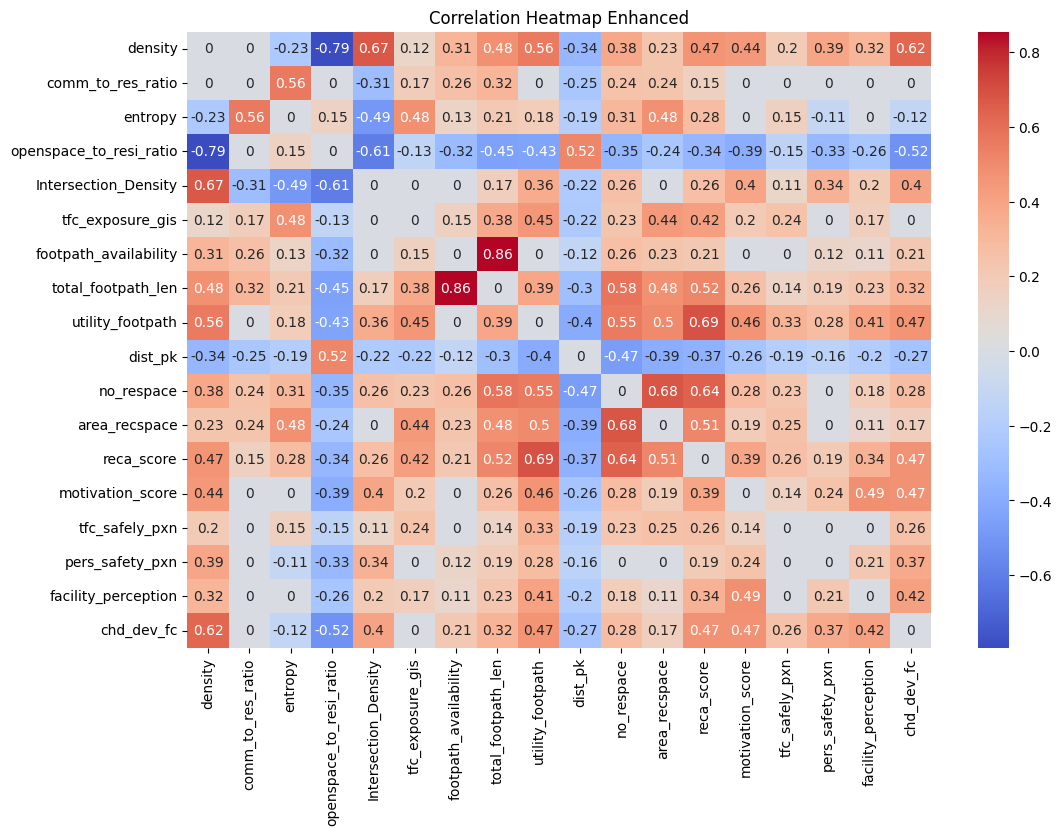

In [98]:
predictors=['density', 'comm_to_res_ratio', 'entropy',
       'openspace_to_resi_ratio', 'Intersection_Density', 'tfc_exposure_gis',
       'footpath_availability', 'total_footpath_len', 'utility_footpath',
       'dist_pk', 'no_respace', 'area_recspace', 'reca_score', 'motivation_score', 'tfc_safely_pxn',
       'pers_safety_pxn', 'facility_perception', 'chd_dev_fc']
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the significance level and minimum correlation coefficient
significance_level = 0.05
min_corr_coeff = 0

# Calculate pairwise correlations and p-values
corr_matrix = df[predictors].corr()
p_values = {}

for i in range(len(predictors)):
    for j in range(i+1, len(predictors)):
        stat, p = stats.pearsonr(df[predictors[i]], df[predictors[j]])
        p_values[(predictors[i], predictors[j])] = p

# Filter significant correlations
significant_correlations = []

for i in range(len(predictors)):
    for j in range(i+1, len(predictors)):
        if p_values[(predictors[i], predictors[j])] < significance_level and abs(corr_matrix.iloc[i, j]) > min_corr_coeff:
            significant_correlations.append((predictors[i], predictors[j], corr_matrix.iloc[i, j]))

# Sort correlations in descending order
significant_correlations.sort(key=lambda x: x[2], reverse=True)

# Create a new matrix with only significant correlations
new_corr_matrix = pd.DataFrame(np.zeros((len(predictors), len(predictors))), columns=predictors, index=predictors)

for i, j, corr in significant_correlations:
    new_corr_matrix.loc[i, j] = corr
    new_corr_matrix.loc[j, i] = corr

# Heatmap visualization
plt.figure(figsize=(12, 8))
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(new_corr_matrix, annot=True, cmap=cmap)
plt.title('Correlation Heatmap Enhanced')
plt.show()

In [100]:

from tabulate import tabulate

# Calculate correlations and p-values
correlations = []
p_values = []

for predictor in predictors:
    corr, p = stats.pearsonr(df[predictor], df['chd_dev_fc'])
    correlations.append(corr)
    p_values.append(p)

# Create a list of lists containing the feature names, correlations, and p-values
table = [[predictor, round(corr, 3), round(p, 3)] for predictor, corr, p in zip(predictors, correlations, p_values)]

# Sort the table in descending order based on the correlation coefficient
table.sort(key=lambda x: x[1], reverse=True)

# Add a header to the table
header = ['Feature', 'Correlation', 'P-value']

# Print the table using tabulate
print('plot of corr child dev factor Vs indep variables')
print(tabulate(table, headers=header, tablefmt='grid'))

plot of corr child dev factor Vs indep variables
+-------------------------+---------------+-----------+
| Feature                 |   Correlation |   P-value |
+=========================+===============+===========+
| chd_dev_fc              |         1     |     0     |
+-------------------------+---------------+-----------+
| density                 |         0.624 |     0     |
+-------------------------+---------------+-----------+
| reca_score              |         0.471 |     0     |
+-------------------------+---------------+-----------+
| motivation_score        |         0.469 |     0     |
+-------------------------+---------------+-----------+
| utility_footpath        |         0.466 |     0     |
+-------------------------+---------------+-----------+
| facility_perception     |         0.416 |     0     |
+-------------------------+---------------+-----------+
| Intersection_Density    |         0.404 |     0     |
+-------------------------+---------------+-----------+

## ML encapsulated modelling


In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
import pandas as pd
from math import sqrt
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_models_regress(df, target_variable, feature_cols, ordinal_features, onehot_features, exclude_col, models, param_grids):
    """Evaluates multiple regression models with hyperparameter tuning.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target_variable (str): The name of the target column.
        feature_cols (list): A list of feature column names.
        ordinal_features (list): A list of ordinal feature column names.
        onehot_features (list): A list of categorical feature column names.
        exclude_col (list): Columns to exclude from scaling.
        models (list): A list of scikit-learn model objects.
        param_grids (dict): A dictionary mapping model names to their hyperparameter grids.

    Returns:
        pd.DataFrame: A DataFrame containing the results for each model.
    """

    results = {'Model': [], 'MAE':[], 'Explained variance':[],
        'RMSE':[],'MSE': [], 'R2Score': [], 'Best Params': []}

    for model_name, model in models.items():
        # Get hyperparameter grid for the current model
        param_grid = param_grids.get(model_name, {})

        X = df[feature_cols]
        y = df[target_variable]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Preprocessing Pipeline
        preprocessor = ColumnTransformer(
        transformers=[
            ('oe_type', OrdinalEncoder(categories='auto'), ordinal_features),
            ('onehot', OneHotEncoder(categories= 'auto',handle_unknown='ignore', sparse=False), onehot_features),
            ('scaler', StandardScaler(), [col for col in feature_cols if col not in ordinal_features + onehot_features + exclude_col])
        ],
        remainder='passthrough'
        )
        # Fit the preprocessor
        preprocessor.fit(X_train)

        # Pipeline with GridSearchCV for hyperparameter tuning
        pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
        ])

        grid_search = GridSearchCV(pipe, param_grid, scoring='neg_mean_squared_error', cv=5)
        grid_search.fit(X_train, y_train)
        # Troubleshoot prints
        #print(f' model name:{model_name} parameter grid  is {grid_search.best_params_} ')

        #print(grid_search.best_estimator_)
        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out(feature_cols)


        # Make predictions on the test data and store them in y_preds
        y_preds = grid_search.predict(X_test)

        # ... (Calculations of mse, r2)
        mae=mean_absolute_error(y_test, y_preds)
        mse=mean_squared_error(y_test, y_preds)
        explained_var=explained_variance_score(y_test, y_preds)
        rmse=sqrt(mean_squared_error(y_test, y_preds))
        r2= r2_score(y_test, y_preds)

        results['Model'].append(model_name)
        results['MAE'].append(mae)

        results['MSE'].append(mse)
        results['Explained variance'].append(explained_var)
        results['RMSE'].append(rmse)
        results['R2Score'].append(r2)
        if model_name == 'RidgeRegression' or model_name == 'LassoRegression':
            results['Best Params'].append(grid_search.best_params_) # cant get best estimator. need to modify
        else:
            results['Best Params'].append(grid_search.best_params_)
        # Print features of importance
        if hasattr(grid_search.best_estimator_.named_steps['model'], 'coef_'):

            coefficients = pd.DataFrame(zip(X.columns, grid_search.best_estimator_.named_steps['model'].coef_), columns=['Feature', 'Coefficient'])

            # Sort coefficients in descending order by absolute value
            coefficients['Abs Coefficient'] = coefficients['Coefficient'].abs()  # Temporary column for sorting
            coefficients = coefficients.sort_values(by=['Abs Coefficient'], ascending=False)
            del coefficients['Abs Coefficient']  # Remove temporary column



            # Print the sorted coefficients
            print(f'The coeff for model : {model_name} (Sorted)')
            print(coefficients)


            # Plot the top 5 features- change as reqd
            top_5_features = coefficients.head(5)
            plt.figure(figsize=(8, 5))  # Adjust figure size as needed
            plt.bar(top_5_features['Feature'], top_5_features['Coefficient'])
            plt.xlabel("Features")
            plt.ylabel("Coefficient Value")
            plt.title(f"Top 5 Features by Coefficient Value for: {model_name}")
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

        # Print and plot feature of importances For tree based models like rf
        if hasattr(grid_search.best_estimator_.named_steps['model'], 'feature_importances_'):

            feature_importances = pd.Series(grid_search.best_estimator_.named_steps['model'].feature_importances_, index=feature_names)
            feature_importances.sort_values(ascending=False, inplace=True)
            # Top 5 feature importances- Change as reqd
            top_5_importances = feature_importances.sort_values(ascending=False).head(5)

            plt.figure(figsize=(10, 6))
            sns.barplot(x=top_5_importances.index, y=top_5_importances.values)
            # Set Title
            plt.title(f'Top 5 Feature Importances in model: {model_name}')

            # Rotate x-axis labels
            plt.xticks(rotation=45, ha='right')
            # Adjust layout to prevent labels from overlapping
            plt.tight_layout()
            plt.show()



            ''' if reqd to plot whole list

            # Plot feature importances
            plt.figure(figsize=(10, 6))
            sns.barplot(x=feature_importances.index, y=feature_importances.values)
            plt.title(f"Feature Importances: {model_name}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
            '''

    return pd.DataFrame(results)




## ML workflow

### Step1: seggregate variable
List variables as per treatment. OH, Lable etc



In [ ]:
df.columns
# You can drop unrequired data not used for analysis. Not mandatory
# df=df.drop(columns=['id', 'social_intearaction','neighbourhd_att'])

In [65]:
#  1. Choose Target variable
target_variable = 'chd_dev_fc'

# 2. Feature selection (keep experimenting with features)
feature_cols = [ 'sector', 'density', 'comm_to_res_ratio', 'entropy',
       'openspace_to_resi_ratio', 'Intersection_Density', 'tfc_exposure_gis',
       'footpath_availability', 'total_footpath_len', 'utility_footpath',
       'dist_pk', 'no_respace', 'area_recspace', 'reca_score', 'age_cat',
        'income_cat', 'motivation_score', 'tfc_safely_pxn',
       'pers_safety_pxn', 'facility_perception','mode_tpt_sch','gender']  # Example features
  # Example features
# 3. Define exclude column - this will not churn the column in Standard Scalar in ppl and mantain ordinality
# Put your lable encoded and manually encoded ordinal coln here
exclude_cols=['mode_tpt_sch','gender'] # excluded is binary to bypass scalar
# 4. Specify columns for different encoding types
ordinal_features = []
onehot_features = ['sector']

## Step 2: decide the algo and the hyper parameters
Call the main ML function by setting the model list and other hyper parameters. Long list of hyper parameters is higly computing intensive.

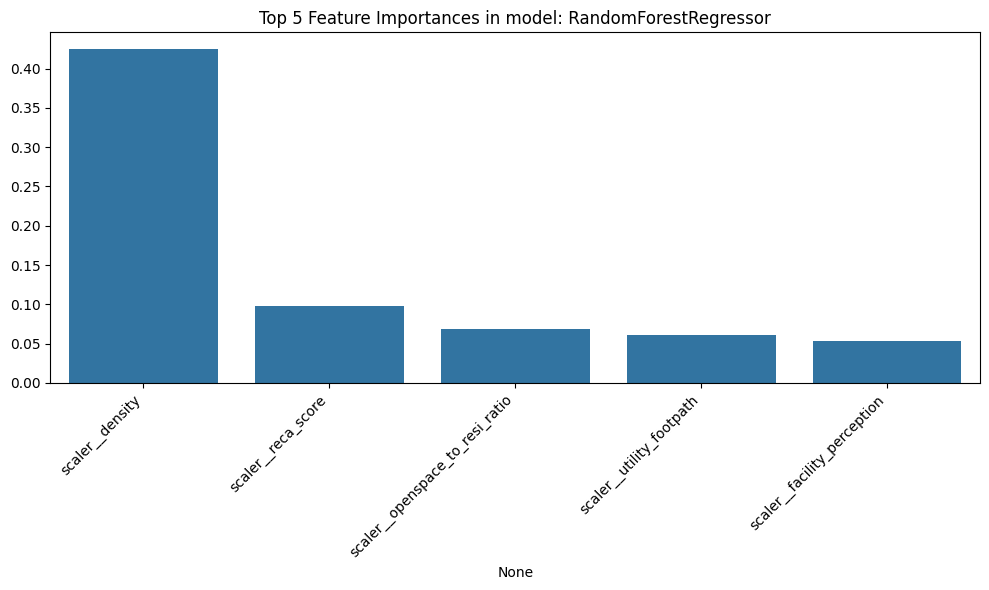

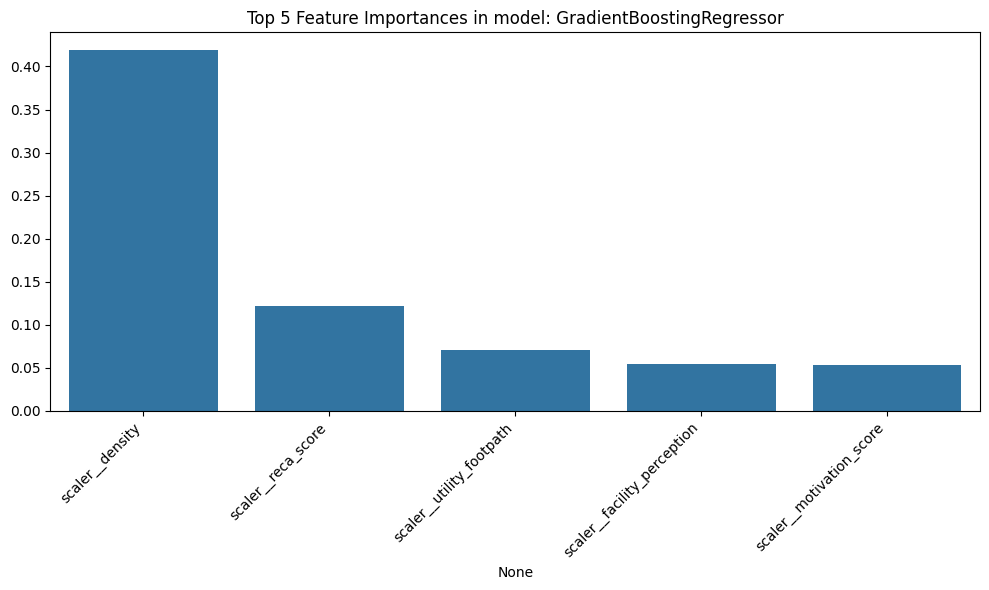

The coeff for model : LinearRegression (Sorted)
                    Feature   Coefficient
3                   entropy -1.924315e+12
4   openspace_to_resi_ratio -1.924315e+12
2         comm_to_res_ratio -1.924315e+12
1                   density -1.924315e+12
0                    sector -1.924315e+12
17           tfc_safely_pxn  5.086670e-01
5      Intersection_Density  2.446209e-01
21                   gender  2.040710e-01
13               reca_score  1.643650e-01
20             mode_tpt_sch  1.138611e-01
11               no_respace  1.081522e-01
8        total_footpath_len -9.725794e-02
9          utility_footpath -9.513789e-02
7     footpath_availability  9.303977e-02
14                  age_cat  7.516792e-02
6          tfc_exposure_gis  3.231575e-02
10                  dist_pk -3.213326e-02
12            area_recspace -2.285032e-02
18          pers_safety_pxn  1.577759e-02
16         motivation_score  1.487314e-02
15               income_cat -1.315538e-02
19      facility_perception 

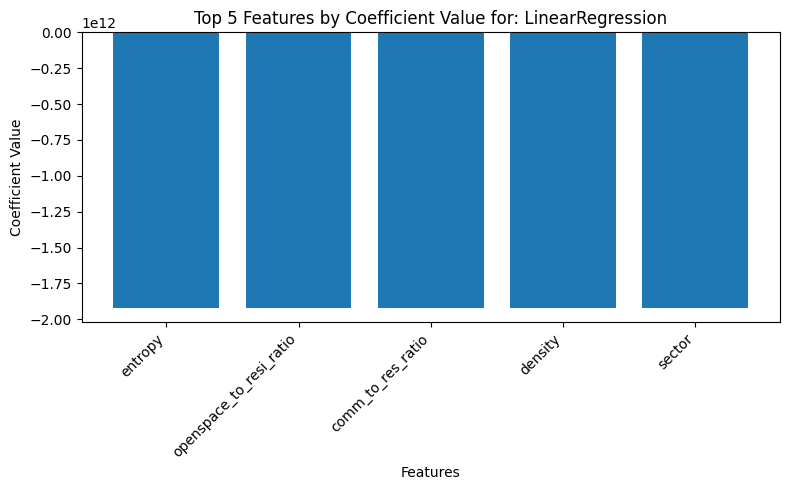

The coeff for model : RidgeRegression (Sorted)
                    Feature  Coefficient
3                   entropy    -0.653195
0                    sector     0.601735
17           tfc_safely_pxn     0.471540
1                   density     0.415991
4   openspace_to_resi_ratio    -0.397128
5      Intersection_Density     0.236120
21                   gender     0.196618
13               reca_score     0.150603
11               no_respace     0.123529
20             mode_tpt_sch     0.113866
9          utility_footpath    -0.103894
8        total_footpath_len    -0.100838
14                  age_cat     0.071017
7     footpath_availability     0.066165
12            area_recspace    -0.049571
10                  dist_pk    -0.042516
6          tfc_exposure_gis     0.041125
2         comm_to_res_ratio     0.032596
18          pers_safety_pxn     0.014961
16         motivation_score     0.011956
15               income_cat    -0.011069
19      facility_perception     0.008331


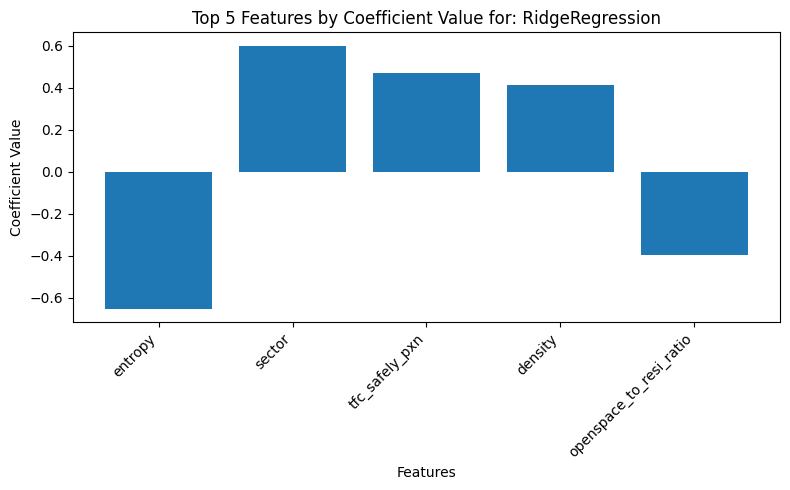

The coeff for model : LassoRegression (Sorted)
                    Feature  Coefficient
0                    sector          0.0
1                   density         -0.0
20             mode_tpt_sch          0.0
19      facility_perception         -0.0
18          pers_safety_pxn          0.0
17           tfc_safely_pxn          0.0
16         motivation_score          0.0
15               income_cat          0.0
14                  age_cat         -0.0
13               reca_score          0.0
12            area_recspace          0.0
11               no_respace          0.0
10                  dist_pk          0.0
9          utility_footpath          0.0
8        total_footpath_len         -0.0
7     footpath_availability         -0.0
6          tfc_exposure_gis         -0.0
5      Intersection_Density          0.0
4   openspace_to_resi_ratio         -0.0
3                   entropy          0.0
2         comm_to_res_ratio          0.0
21                   gender          0.0


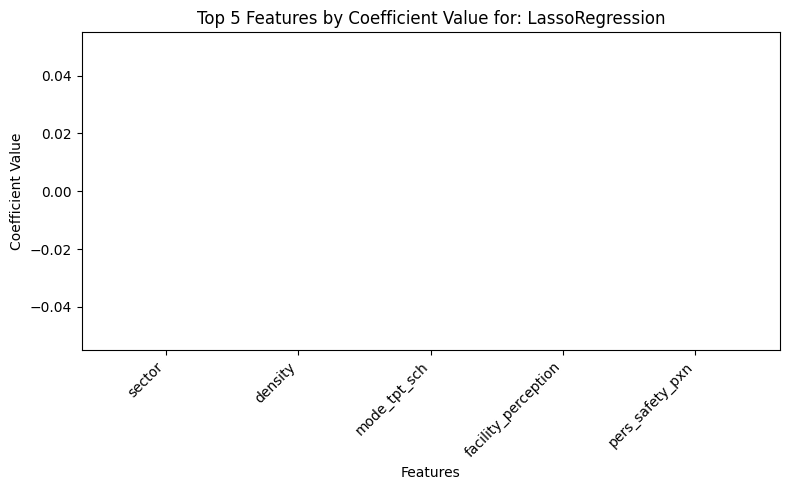

╒════╤═══════════════════════════╤══════════╤══════════════════════╤══════════╤══════════╤════════════╤══════════════════════════════════════════════════════════╕
│    │ Model                     │      MAE │   Explained variance │     RMSE │      MSE │    R2Score │ Best Params                                              │
╞════╪═══════════════════════════╪══════════╪══════════════════════╪══════════╪══════════╪════════════╪══════════════════════════════════════════════════════════╡
│  0 │ RandomForestRegressor     │ 0.502653 │          0.539593    │ 0.608682 │ 0.370493 │  0.53307   │ {'model__max_depth': 5, 'model__n_estimators': 200}      │
├────┼───────────────────────────┼──────────┼──────────────────────┼──────────┼──────────┼────────────┼──────────────────────────────────────────────────────────┤
│  1 │ GradientBoostingRegressor │ 0.506665 │          0.556489    │ 0.59525  │ 0.354323 │  0.55345   │ {'model__learning_rate': 0.1, 'model__n_estimators': 50} │
├────┼────────────────

In [93]:
from tabulate import tabulate

# Calling the ML function
# List the modules you want to run
# Set parameter - warning be pragmatic else pgme will run for eternity in colab
models = {
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'LinearRegression': LinearRegression(),
    'RidgeRegression':Ridge(),
    'LassoRegression':Lasso()
}



# Hyper parameter tuning
param_grids = {
    'RandomForestRegressor': {'model__n_estimators': [50, 100, 200], 'model__max_depth': [3, 5, 8]},
    'GradientBoostingRegressor': {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 0.5]},
    #  parameters to tune for Linear Regression by default is nil. trying to fit intercept
    'LinearRegression': {'model__fit_intercept': [True, False]},
    'Lasso': {'model__alpha': [10**-4, 10**-3, 10**-2, 10**-1, 1]},  #  values for 'alpha' for lasso
    'Ridge': {'model__alpha': [0.01, 0.1, 1, 10]}   # Sample values for 'alpha' for ridge- log scale
}

results_df = evaluate_models_regress(df, target_variable, feature_cols, ordinal_features,
                                     onehot_features, exclude_cols, models, param_grids)

# Tabulate the Results
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))

### Inference of ML algos

1. Lasso: some thing wrong in lasso regression hyper parameter fitting and perhaps preprocessor pipeline. Desregard results.
2. Coeff in linear regression are very low, however the scores are in line.
3. The best model is GBR with R2score of 0.55. Model only serves purposes of identifying significant factors with direction of movement.
From prediction perspective has poor utility.
4. For social studies factors of 0.5 are considered adequare due to complex interconnections unlike in physical scientific applications.
